<a href="https://colab.research.google.com/github/IbrahemAmar/Data-mining-and-Machine-Learning-/blob/main/lab10_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Running the example, the accuracy on the training and validation test is printed
each epoch and at the end of the classification error rate is printed.

Note: Your results may vary given the stochastic nature of the algorithm or
evaluation procedure, or differences in numerical precision. Consider running the example
a few times and compare the average outcome.

Epochs may take about 45 seconds to run on the GPU (e.g. on AWS).
You can see that the network achieves an error rate of 0.95%, which is better than
our simple multi-layer perceptron model above.

In [1]:
# Simple CNN for the MNIST Dataset
from keras.datasets import fashion_mnist, mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import random
import numpy as np
import cv2

In [2]:
# define a simple CNN model
def baseline_model():
    # create model
    model = Sequential()


    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D())


    # Adding the requested 3x3 Conv layer with 32 filters
    model.add(Conv2D(32, (3, 3), activation='relu'))
    # Adding the requested Max Pooling
    model.add(MaxPooling2D())


    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(nClasses, activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [3]:
def plotSamples(data,rows,cols,tLabels,names,pLabels=[]):
    fig, axs = plt.subplots(rows,cols)
    nDigits = data.shape[0]
    for i in range(rows):
        for j in range(cols):
            index = random.randint(0,nDigits-1)
            axs[i,j].imshow(data[index],cmap = 'gray')
            # remove axes titles
            axs[i,j].axis('off')
            if (np.any(pLabels)):
                axs[i,j].set_title('P: %s, T: %s' % (names[pLabels[index]], names[tLabels[index]]) ,fontdict={'fontsize': 10})
            else:
                axs[i,j].set_title('T: %s' % names[tLabels[index]],fontdict={'fontsize': 10})
            # show the figure
    plt.show()

In [4]:
def plotTrainingCurves(history,numEpochs):
  #Process ploting
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_accuracy'])
  plt.plot(history.history['val_loss'])
  plt.axis([0,numEpochs,0,1])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Accuracy','loss','val_accuracy','val_loss'])
  plt.show()

In [5]:
# load data
(trainData, trainLabels), (testData, testLabels) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainData.shape, trainLabels.shape))
print('Test: X=%s, y=%s' % (testData.shape, testLabels.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [6]:
names = ["0", "1", "2", "3", "4",
               "5", "6", "7", "8", "9"]

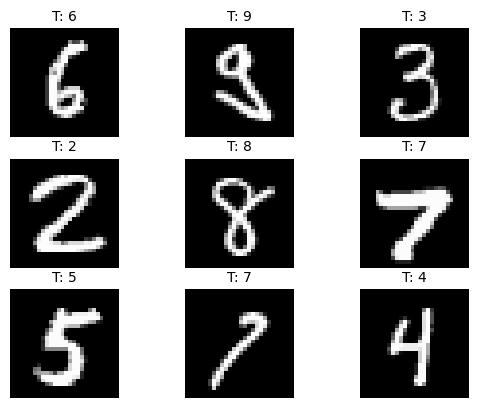

In [7]:
rows = 3
cols = 3
plotSamples(trainData,rows,cols,trainLabels,names)

In [8]:
# reshape to be [samples][width][height][channels]
trainData = trainData.reshape((trainData.shape[0], 28, 28, 1)).astype('float32')
testData = testData.reshape((testData.shape[0], 28, 28, 1)).astype('float32')

In [9]:
# one hot encode outputs
catTrainLabels = to_categorical(trainLabels)
catTestLabels = to_categorical(testLabels)
XtrainData = trainData/255.0
XtestData = testData/255.0
nClasses = catTestLabels.shape[1]

In [10]:
# build the model
model = baseline_model()
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,994 (242.16 KB)

 Trainable params: 61,994 (242.16 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Fit the model
nEpochs = 6
history=model.fit(XtrainData, catTrainLabels,
                  validation_data=(XtestData, catTestLabels),
                  epochs=nEpochs, batch_size=200)

Epoch 1/6
300/300 ━━━━━━━━━━━━━━━━━━━━ 54s 172ms/step - accuracy: 0.7859 - loss: 0.7083 - val_accuracy: 0.9773 - val_loss: 0.0758
Epoch 2/6
300/300 ━━━━━━━━━━━━━━━━━━━━ 79s 164ms/step - accuracy: 0.9725 - loss: 0.0912 - val_accuracy: 0.9841 - val_loss: 0.0491
Epoch 3/6
300/300 ━━━━━━━━━━━━━━━━━━━━ 80s 158ms/step - accuracy: 0.9802 - loss: 0.0660 - val_accuracy: 0.9851 - val_loss: 0.0438
Epoch 4/6
300/300 ━━━━━━━━━━━━━━━━━━━━ 78s 146ms/step - accuracy: 0.9835 - loss: 0.0541 - val_accuracy: 0.9894 - val_loss: 0.0337
Epoch 5/6
300/300 ━━━━━━━━━━━━━━━━━━━━ 51s 168ms/step - accuracy: 0.9867 - loss: 0.0433 - val_accuracy: 0.9889 - val_loss: 0.0295
Epoch 6/6
300/300 ━━━━━━━━━━━━━━━━━━━━ 45s 151ms/step - accuracy: 0.9888 - loss: 0.0378 - val_accuracy: 0.9888 - val_loss: 0.0324


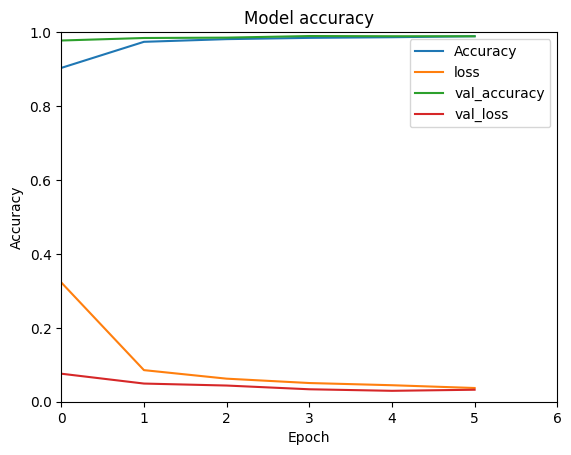

In [12]:
#Process ploting
plotTrainingCurves(history,nEpochs)

In [13]:
# Final evaluation of the model
scores = model.evaluate(testData, catTestLabels, verbose=0)
print("CNN validation accuracy: %.2f" % scores[1])

CNN validation accuracy: 0.99


In [14]:
#make  predictions
predLabels = model.predict(testData).argmax(1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


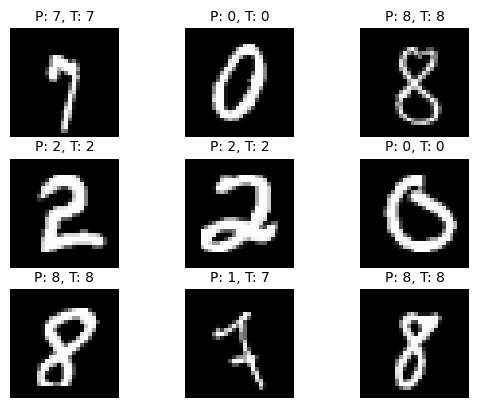

In [15]:
# plot predictions of random 9 test images
plotSamples(testData,rows,cols,testLabels,names,predLabels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


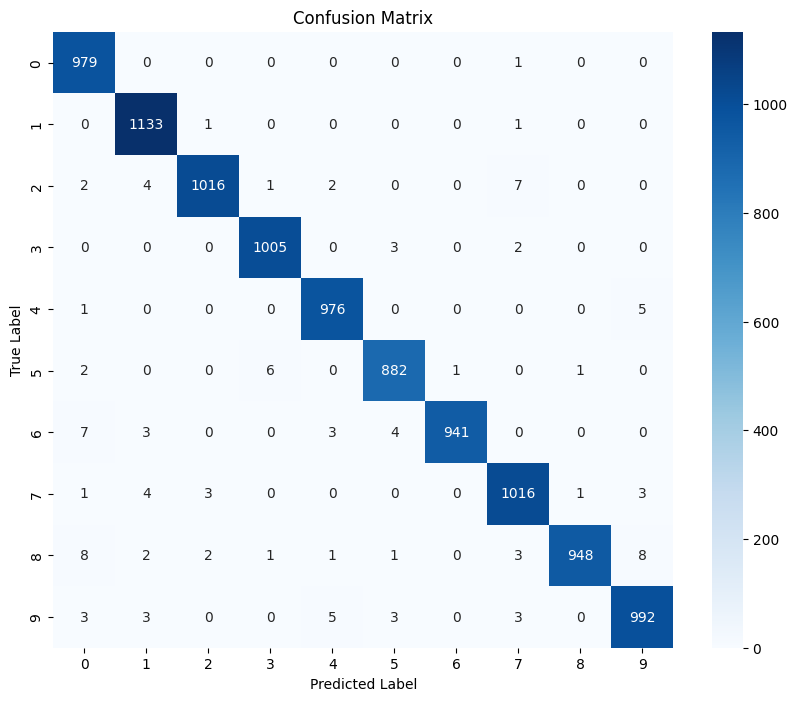


--- Prediction Error Percentage per Class ---

0           : 0.10% error
1           : 0.18% error
2           : 1.55% error
3           : 0.50% error
4           : 0.61% error
5           : 1.12% error
6           : 1.77% error
7           : 1.17% error
8           : 2.67% error
9           : 1.68% error


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Get predictions using the NORMALIZED data (XtestData)
# Note: The original notebook had a bug using 'testData' here.
y_pred_probs = model.predict(XtestData)
y_pred = np.argmax(y_pred_probs, axis=1)

# 2. Create the Confusion Matrix
# rows = True Label, columns = Predicted Label
cm = confusion_matrix(testLabels, y_pred)

# 3. Plot the Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=names, yticklabels=names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 4. Calculate and print % of prediction errors for every dress type
# The sum of a row represents the total actual instances of that class
# The diagonal element represents the correct predictions for that class
print("\n--- Prediction Error Percentage per Class ---\n")

for i, name in enumerate(names):
    total_instances = np.sum(cm[i, :]) # Sum of the row
    correct_predictions = cm[i, i]      # Diagonal value
    errors = total_instances - correct_predictions

    error_rate = (errors / total_instances) * 100

    print(f"{name:<12}: {error_rate:.2f}% error")

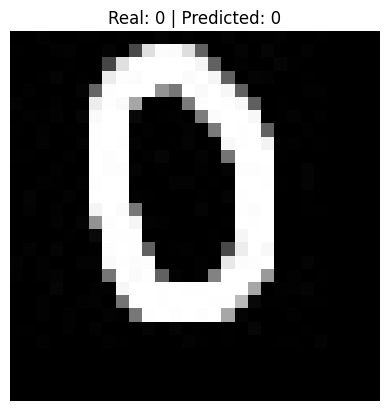

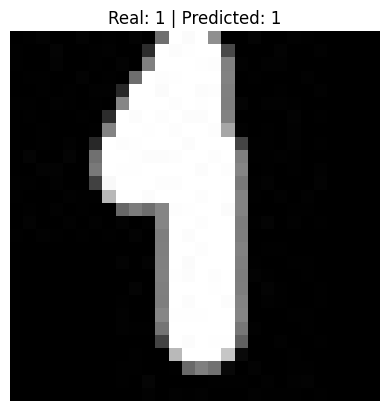

In [17]:
def check_my_digit(file_name, real_number):
    # 1. Read the image in grayscale (0 means gray)
    img = cv2.imread(file_name, 0)

    # 2. Resize it to 28x28 because that is what the model expects
    img = cv2.resize(img, (28, 28))

    # 3. Invert colors
    # In Paint, we draw black (0) on white (255).
    # But the dataset is white (255) on black (0).
    # So we flip it by doing 255 minus the value.
    img = 255 - img

    # 4. Normalize (divide by 255 to get numbers between 0 and 1)
    img = img / 255.0

    # 5. Reshape to fit the model (1 image, 28 width, 28 height, 1 channel)
    ready_image = img.reshape(1, 28, 28, 1)

    # 6. Predict
    prediction = model.predict(ready_image, verbose=0).argmax()

    # 7. Show the image and the result
    plt.imshow(img, cmap='gray')
    plt.title("Real: " + str(real_number) + " | Predicted: " + str(prediction))
    plt.axis('off') # hide the x/y axis numbers
    plt.show()

# Calling the function for 2 examples
# Make sure you uploaded "0.jpg" and "1.jpg" to the files area first!
check_my_digit("0.jpg", 0)
check_my_digit("1.jpg", 1)

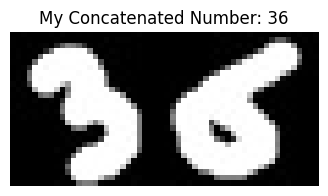

In [19]:
def show_big_number(number):
    # Convert the number to a string so we can loop over digits
    number_str = str(number)

    # List to hold the image data for each digit
    all_images = []

    for digit in number_str:
        # Create the filename, e.g., if digit is '5', file is "5.jpg"
        filename = digit + ".jpg"

        # --- Logic from Section 10 ---
        # 1. Read image
        img = cv2.imread(filename, 0)

        # Check if file exists to avoid crashing
        if img is None:
            print("Error: I cannot find " + filename)
            return

        # 2. Resize to 28x28
        img = cv2.resize(img, (28, 28))

        # 3. Invert colors (255 - image)
        img = 255 - img


        # Add this digit image to our list
        all_images.append(img)

    # Connect all images in the list horizontally (axis 1)
    # This creates one long image strip
    final_image = np.hstack(all_images)

    # Plot the result
    plt.figure(figsize=(10, 2)) # Make the figure wide
    plt.imshow(final_image, cmap='gray')
    plt.axis('off')
    plt.title("My Concatenated Number: " + number_str)
    plt.show()

# Example: Draw the number 10 (Make sure 1.jpg and 0.jpg are uploaded!)
show_big_number(36)

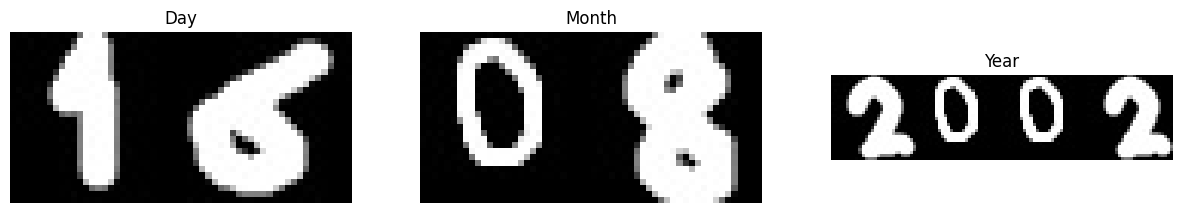

In [21]:
# 1. Helper function (Modified from Section 11 to RETURN the image)
def get_number_image(number):
    number_str = str(number)
    images_list = []

    for digit in number_str:
        # Load the digit image (e.g., "1.jpg", "6.jpg")
        filename = digit + ".jpg"
        img = cv2.imread(filename, 0)

        if img is None:
            print(f"Error: missing {filename}")
            return None

        # Resize to 28x28
        img = cv2.resize(img, (28, 28))

        # Invert colors (Student style)
        img = 255 - img

        images_list.append(img)

    # Concatenate images horizontally
    return np.hstack(images_list)

# 2. Create the images for Day, Month, Year
# We use string "08" to make sure it draws the '0' and the '8'
day_img = get_number_image("16")
month_img = get_number_image("08")
year_img = get_number_image("2002")
# 3. Plot them all in one line
plt.figure(figsize=(15, 5))
# Plot Day
plt.subplot(1, 3, 1) # 1 row, 3 columns, position 1
plt.imshow(day_img, cmap='gray')
plt.title("Day")
plt.axis('off')
# Plot Month
plt.subplot(1, 3, 2) # 1 row, 3 columns, position 2
plt.imshow(month_img, cmap='gray')
plt.title("Month")
plt.axis('off')
# Plot Year
plt.subplot(1, 3, 3) # 1 row, 3 columns, position 3
plt.imshow(year_img, cmap='gray')
plt.title("Year")
plt.axis('off')

plt.show()